## **Loan Amount Prediction Analysis**

This dataset features 279,856 loan applications, each with 15 details about the applicant, including things like age, income, credit score, the amount of the loan, and job type. The data includes both numbers and categories, and there are some missing values in the 'Occupation' column that need to be filled in.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/AIG/ML_Project/credit_data.csv')


### **Data Inregration and Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [ ]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Credit Score,0
Credit History Length,0
Number of Existing Loans,0
Loan Amount,0
Loan Tenure,0
Existing Customer,0
State,0


In [ ]:
df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76499.163856,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.350155
std,15.311051,42875.575193,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.509196
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


### **Handle Outlier**

In [ ]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

outlier=df.select_dtypes(include=["int64","float64"]).columns
df=remove_outliers(df,outlier)

### **Data Preprocessing**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


df.columns=df.columns.str.lower()
target='loan amount'
df=df.dropna(subset=[target])
x=df.drop(target,axis=1)
y=df[target]

numeric_cols=x.select_dtypes(include=['int64','float64']).columns

nonimal_cols=x.select_dtypes(include="object").columns

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

numeric_transform=Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('encoder',StandardScaler())
])

nominal_transforms=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

process_data=ColumnTransformer([
    ("numeric",numeric_transform,numeric_cols),
    ("norminal",nominal_transforms,nonimal_cols)

])

### **Visualization**

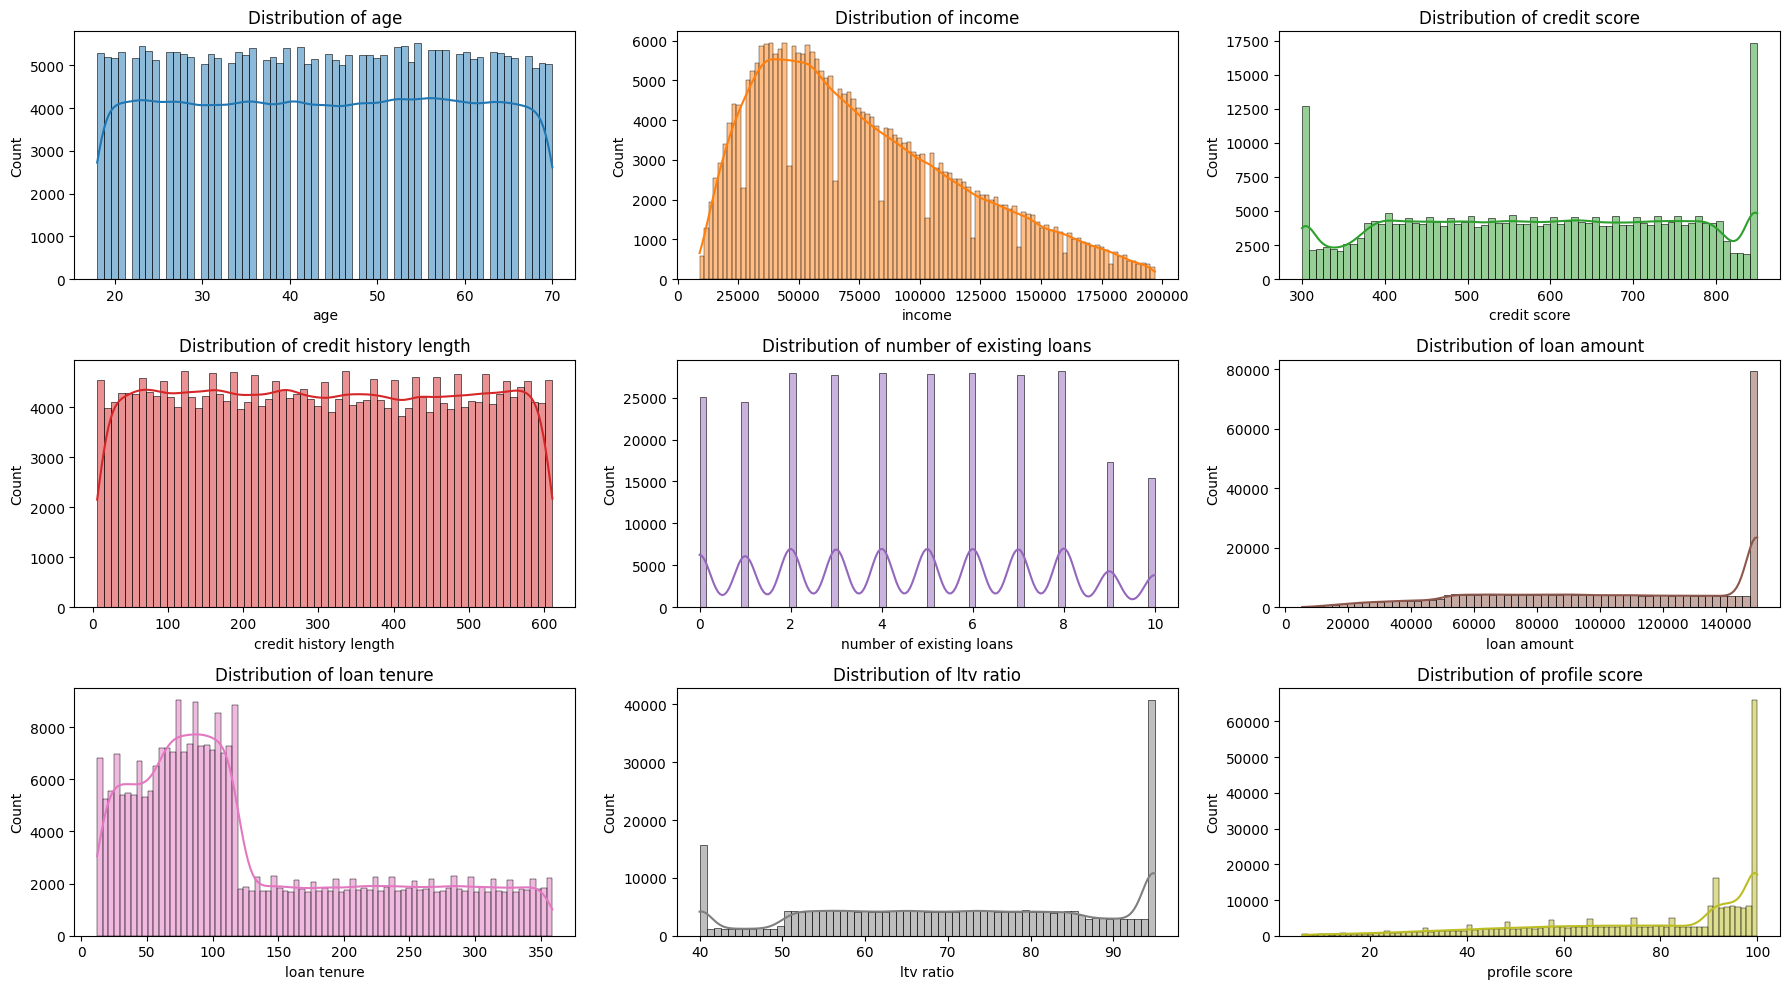

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=f"C{i}")
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

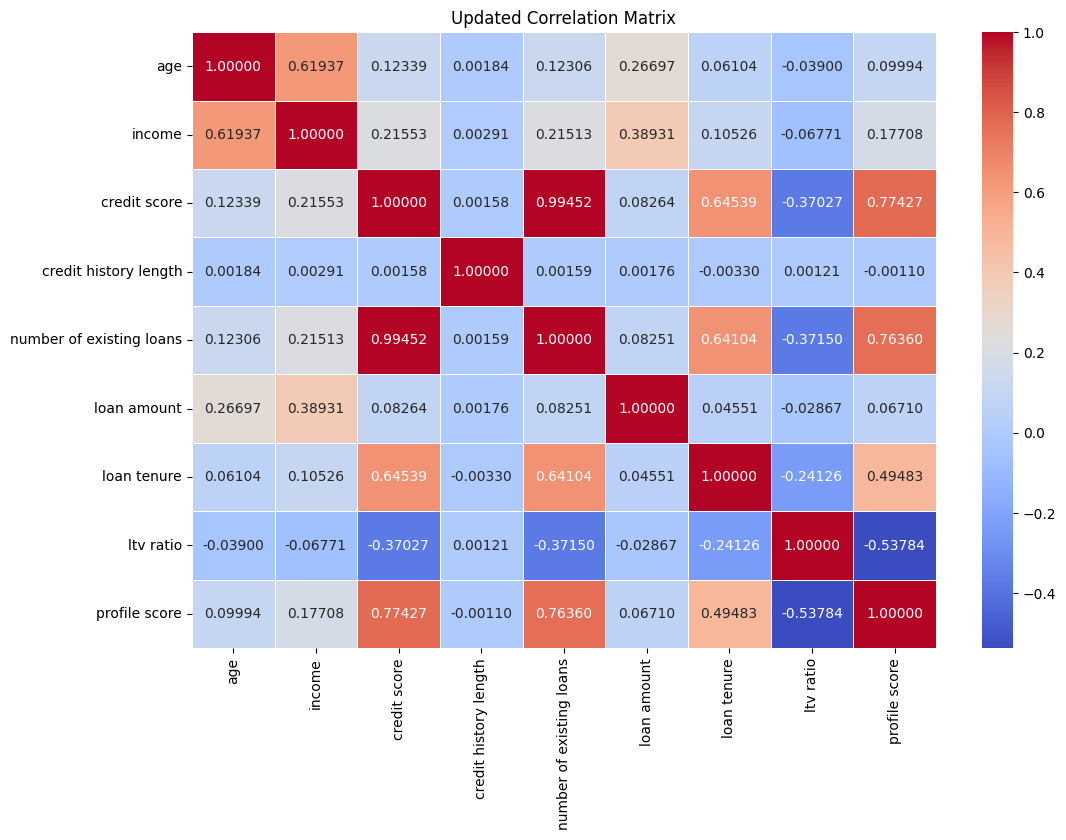

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".5f", linewidths=0.5)
plt.title("Updated Correlation Matrix")
plt.show()

**Model Implementation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_LinearRegression=Pipeline([
    ('process',process_data),
    ('model',LinearRegression())
])

model_DecisionTree=Pipeline([
    ('process',process_data),
    ('model',DecisionTreeRegressor(random_state=100))
])


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model_LinearRegression.fit(x_train, y_train)
y_predict_LR = model_LinearRegression.predict(x_test)

model_DecisionTree.fit(x_train, y_train)
y_predict_DecisionTree = model_DecisionTree.predict(x_test)

print('--------------------------------------------------')
print("Metrics for Linear Regression:")
print('MAE',mean_absolute_error(y_test,y_predict_LR))
print('MSE',mean_squared_error(y_test,y_predict_LR))
print('R2',r2_score(y_test,y_predict_LR))
print('--------------------------------------------------')
print("Metrics for DecisionTree Regression:")
print('MAE',mean_absolute_error(y_test,y_predict_DecisionTree))
print('MSE',mean_squared_error(y_test,y_predict_DecisionTree))
print('R2',r2_score(y_test,y_predict_DecisionTree))
print('--------------------------------------------------')


--------------------------------------------------
Metrics for Linear Regression:
MAE 32277.30377834099
MSE 1387070995.8652153
R2 0.1518030845920445
--------------------------------------------------
Metrics for DecisionTree Regression:
MAE 2894.951482917155
MSE 179961661.48342198
R2 0.8899530545898879
--------------------------------------------------


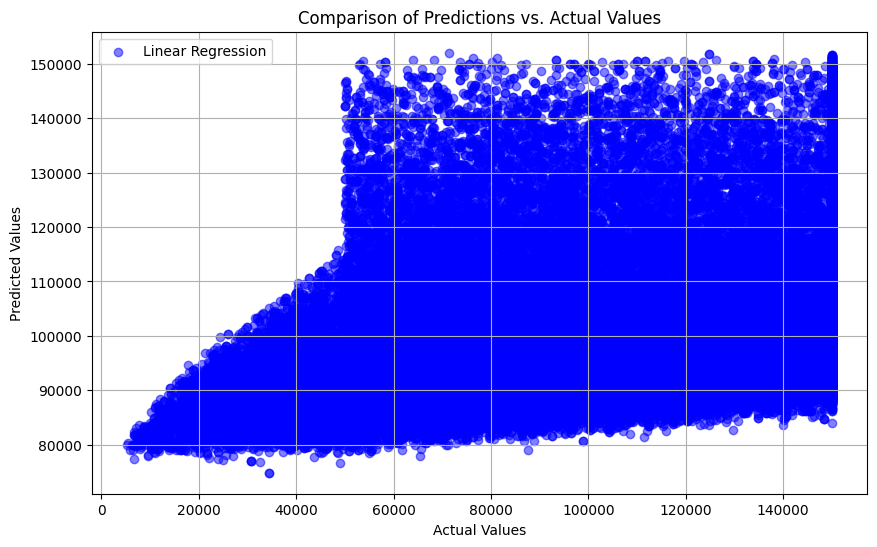

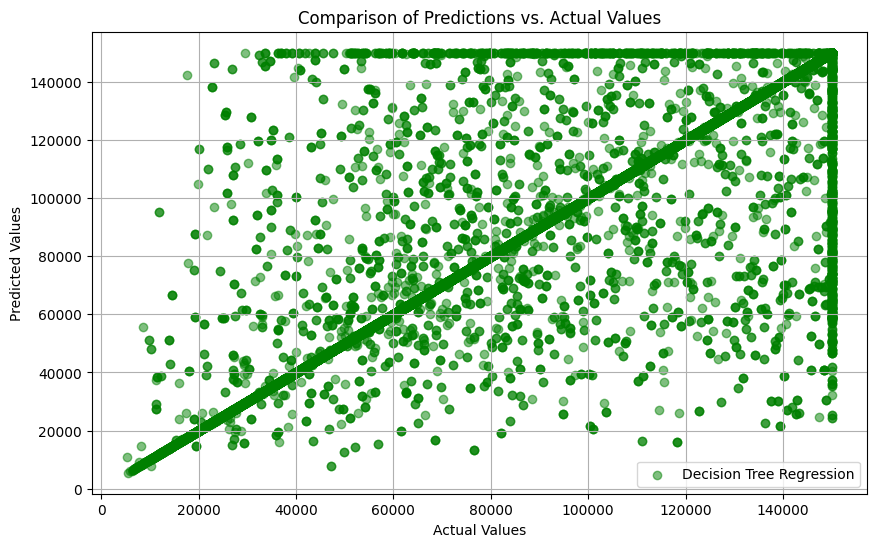

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression
plt.scatter(y_test, y_predict_LR, alpha=0.5, color='blue', label='Linear Regression')
plt.title('Comparison of Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
# Scatter plot for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_DecisionTree, alpha=0.5, color='green', label='Decision Tree Regression')

# Plot a line that represents perfect predictions
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.title('Comparison of Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()




# **Data** Analysis Report
1. **Introduction to Loan Amount Prediction Analysis**

This dataset comprises 279,856 loan application records, each with 15 features, including demographic, financial, and employment details of applicants. Key features include age, income, credit score, loan amount, and employment type, among others. The dataset includes both numeric and categorical data, with some missing values in the 'Occupation' column that need addressing.

Our objective is to predict the loan amount using regression analysis. We will prepare the data by handling missing values and selecting relevant features, then train a regression model to estimate loan amounts based on applicant features.

Dataset Source: https://www.kaggle.com/datasets/yashkmd/credit-profile-two-wheeler-loan-dataset?select=credit_data.csv

2. **Data Preprocessing**

*  The dataset preprocessing involves vital steps to ensure accuracy and consistency in analysis. **Pipelines** in scikit-learn which is a function in allows the sequential a list of transformers to preprocess data efficiently. This function helps maintain consistency, reduces manual errors, and enhances the machine learning workflow.

*   Association with the Imputer function, now known as SimpleImputer, is used to handle missing values in datasets. Handling missing values is particularly crucial. An efficient way to manage missing data during preprocessing is by using SimpleImputer within these pipelines.

*   Incorporating StandardScaler and OneHotEncoder into the preprocessing pipeline ensures effective normalization of numerical data and appropriate conversion of categorical variables.

3. **Model Implementation**

**Linear Regression and Decision Tree Regression**

*   Linear Regression: A model that a linear relationship between the input features and the target variable. It's straightforward and can provide a baseline for performance.

*   Decision Tree Regression: A non-linear model that partitions the data into subsets based on feature values, capable of capturing complex patterns in the data.

4. **Model Evaluation**
--------------------------------------------------
Metrics for Linear Regression:
*  MAE 32277.30
*  MSE 1387070995.86
*  R2 0.15

--------------------------------------------------
Metrics for Decision Tree Regression:
*  MAE 2894.95
*  MSE 179961661.48
*  R2 0.89


5. **Results Interpretation**
**Linear Regression Model:**

The Linear Regression model shows average prediction errors with a Mean Absolute Error (MAE) of 32,277.30 and a high Mean Squared Error (MSE) of 1,387,070,995.86, indicating large variances in prediction errors. Additionally, its R-squared value of 0.15 suggests that the model's inability to capture in loan amounts. The model is not well-performance for predicting loan amounts in this particular dataset, as it fails to complex relationships between the variables.

**Decision Tree Regression**
Model exhibits much stronger performance metrics. It achieves a lower MAE of 2,894.95 and a reduced MSE of 179,961,661.48. Moreover, its R-squared value of 0.89 shows that it successfully explains 89% of predict in loan amounts, which indicates excellent model performance and a effective ability to capture the complexities of the dataset. These metrics clearly suggest that the Decision Tree Regression model is far superior for this prediction task, offering more accurate and reliable predictions compared to the Linear Regression model.

## **Conclusion**

The evaluation of Linear Regression and Decision Tree Regression models for predicting loan amounts highlights a clear disparity in performance. The Linear Regression model, with a high MAE and MSE and a low R-squared value, struggles to accurately predict loan amounts, failing to capture the complex relationships between features. In contrast, the Decision Tree Regression model excels, demonstrating low prediction errors and a high R-squared value, effectively capturing 89% of the variability in loan amounts. This robust performance makes the Decision Tree Regression the superior choice for this task, offering reliable and accurate predictions.

**Potential Implications in Real-World Scenarios**

*